## Procesamiento de Datos

In [2]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.stem import WordNetLemmatizer 
import codecs
import pandas as pd

In [3]:
import pandas as pd
df = pd.read_csv("BDSuicidios3.csv")
df.head()

,Text,Clasificación
0,Ex Wife Threatening SuicideRecently I left my ...,Suicidio
1,i need helpjust help me im crying so hard,Suicidio
2,Honetly idkI dont know what im even doing here...,Suicidio
3,My life is over at 20 years oldHello all. I am...,Suicidio
4,Can you imagine getting old? Me neither.Wrinkl...,Suicidio


In [3]:
df.shape

(2000, 2)

In [5]:
import re

# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text) 
    return text

# Cleaning the text in the review column
df['Cleaned Posts'] = df['Text'].apply(clean)
df.head()

,Text,Clasificación,Cleaned Posts
0,Ex Wife Threatening SuicideRecently I left my ...,Suicidio,Ex Wife Threatening SuicideRecently I left my ...
1,i need helpjust help me im crying so hard,Suicidio,i need helpjust help me im crying so hard
2,Honetly idkI dont know what im even doing here...,Suicidio,Honetly idkI dont know what im even doing here...
3,My life is over at 20 years oldHello all. I am...,Suicidio,My life is over at years oldHello all I am a y...
4,Can you imagine getting old? Me neither.Wrinkl...,Suicidio,Can you imagine getting old Me neither Wrinkle...


In [6]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(Text):
    tags = pos_tag(word_tokenize(Text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df['POS tagged'] = df['Cleaned Posts'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gueva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gueva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gueva\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\gueva\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Text,Clasificación,Cleaned Posts,POS tagged
0,Ex Wife Threatening SuicideRecently I left my ...,Suicidio,Ex Wife Threatening SuicideRecently I left my ...,"[(Ex, n), (Wife, n), (Threatening, n), (Suicid..."
1,i need helpjust help me im crying so hard,Suicidio,i need helpjust help me im crying so hard,"[(need, v), (helpjust, n), (help, v), (im, v),..."
2,Honetly idkI dont know what im even doing here...,Suicidio,Honetly idkI dont know what im even doing here...,"[(Honetly, r), (idkI, a), (dont, n), (know, v)..."
3,My life is over at 20 years oldHello all. I am...,Suicidio,My life is over at years oldHello all I am a y...,"[(life, n), (years, n), (oldHello, None), (yea..."
4,Can you imagine getting old? Me neither.Wrinkl...,Suicidio,Can you imagine getting old Me neither Wrinkle...,"[(imagine, v), (getting, v), (old, a), (neithe..."


In [7]:
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
    
df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,Text,Clasificación,Cleaned Posts,POS tagged,Lemma
0,Ex Wife Threatening SuicideRecently I left my ...,Suicidio,Ex Wife Threatening SuicideRecently I left my ...,"[(Ex, n), (Wife, n), (Threatening, n), (Suicid...",Ex Wife Threatening SuicideRecently leave wi...
1,i need helpjust help me im crying so hard,Suicidio,i need helpjust help me im crying so hard,"[(need, v), (helpjust, n), (help, v), (im, v),...",need helpjust help im cry hard
2,Honetly idkI dont know what im even doing here...,Suicidio,Honetly idkI dont know what im even doing here...,"[(Honetly, r), (idkI, a), (dont, n), (know, v)...",Honetly idkI dont know im even feel like not...
3,My life is over at 20 years oldHello all. I am...,Suicidio,My life is over at years oldHello all I am a y...,"[(life, n), (years, n), (oldHello, None), (yea...",life year oldHello year old balding male hai...
4,Can you imagine getting old? Me neither.Wrinkl...,Suicidio,Can you imagine getting old Me neither Wrinkle...,"[(imagine, v), (getting, v), (old, a), (neithe...",imagine get old neither Wrinkles weight gain...


In [8]:
df[['Text', 'Lemma']]

,Text,Lemma
0,Ex Wife Threatening SuicideRecently I left my ...,Ex Wife Threatening SuicideRecently leave wi...
1,i need helpjust help me im crying so hard,need helpjust help im cry hard
2,Honetly idkI dont know what im even doing here...,Honetly idkI dont know im even feel like not...
3,My life is over at 20 years oldHello all. I am...,life year oldHello year old balding male hai...
4,Can you imagine getting old? Me neither.Wrinkl...,imagine get old neither Wrinkles weight gain...
...,...,...
1995,Do you ever just want someone to talk to and o...,ever want someone talk open person appear
1996,Why is there a health bar in the sky? Oh dear....,health bar sky Oh dear
1997,Ill make a meme about the top comment. comment...,Ill make meme top comment comment away
1998,What are some fun Christmas gift ideas for 16-...,fun Christmas gift idea year old Maybe popul...


## Análisis de sentimiento

### Análisis de sentimiento usando TextBlob

In [9]:
!pip install textblob
from textblob import TextBlob

# function to calculate subjectivity 
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [10]:
fin_data = pd.DataFrame(df[['Text', 'Lemma']])

In [11]:
#fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,Text,Lemma,Polarity,Analysis
0,Ex Wife Threatening SuicideRecently I left my ...,Ex Wife Threatening SuicideRecently leave wi...,0.144444,Positive
1,i need helpjust help me im crying so hard,need helpjust help im cry hard,-0.291667,Negative
2,Honetly idkI dont know what im even doing here...,Honetly idkI dont know im even feel like not...,-0.155042,Negative
3,My life is over at 20 years oldHello all. I am...,life year oldHello year old balding male hai...,-0.004563,Negative
4,Can you imagine getting old? Me neither.Wrinkl...,imagine get old neither Wrinkles weight gain...,-0.053864,Negative


In [12]:
tb_counts = fin_data.Analysis.value_counts()
tb_counts

Positive    945
Negative    833
Neutral     222
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x184cfefa430>,
 [Text(0.09491501469035439, 1.0958974130758454, 'Positive'),
  Text(-0.46366176673311255, -0.9975057724494275, 'Negative'),
  Text(1.2687461318934807, -0.4612843513553554, 'Neutral')],
 [Text(0.05177182619473875, 0.5977622253140974, '47.2%'),
  Text(-0.25290641821806137, -0.5440940576996877, '41.7%'),
  Text(0.7988401571181173, -0.29043829529781634, '11.1%')])

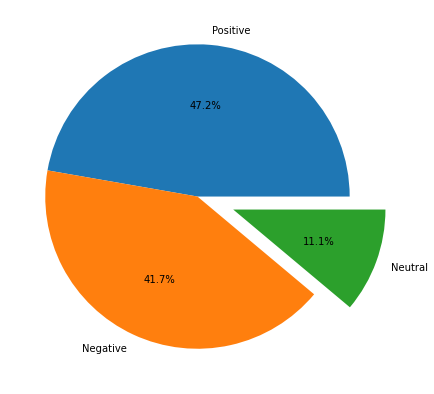

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

tb_count= fin_data.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

### Análisis de sentimiento usando VADER

In [14]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment  
def vadersentimentanalysis(post):
    vs = analyzer.polarity_scores(post)
    return vs['compound']

fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)

In [15]:
# function to analyse 
def vader_analysis(compound):
    if compound >= 0.1:
        return 'Positive'
    elif compound <= -0.1:
        return 'Negative'
    else:
        return 'Neutral'
    
fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()


,Text,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,Ex Wife Threatening SuicideRecently I left my ...,Ex Wife Threatening SuicideRecently leave wi...,0.144444,Positive,-0.9521,Negative
1,i need helpjust help me im crying so hard,need helpjust help im cry hard,-0.291667,Negative,-0.2023,Negative
2,Honetly idkI dont know what im even doing here...,Honetly idkI dont know im even feel like not...,-0.155042,Negative,-0.9687,Negative
3,My life is over at 20 years oldHello all. I am...,life year oldHello year old balding male hai...,-0.004563,Negative,0.3104,Positive
4,Can you imagine getting old? Me neither.Wrinkl...,imagine get old neither Wrinkles weight gain...,-0.053864,Negative,-0.9021,Negative


In [16]:
vader_counts = fin_data['Vader Analysis'].value_counts()
vader_counts

Negative    982
Positive    828
Neutral     190
Name: Vader Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x184cffb52e0>,
 [Text(0.031097634977506766, 1.0995603380891865, 'Negative'),
  Text(-0.3530379778108914, -1.041808133114345, 'Positive'),
  Text(1.2903205714643677, -0.39695443423126986, 'Neutral')],
 [Text(0.016962346351367324, 0.5997601844122834, '49.1%'),
  Text(-0.19256616971503168, -0.5682589816987336, '41.4%'),
  Text(0.8124240635146018, -0.2499342734048736, '9.5%')])

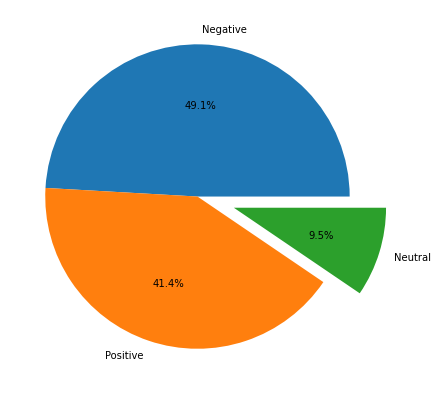

In [17]:
vader_counts= fin_data['Vader Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, .25), autopct='%1.1f%%', shadow=False)
# plt.legend()

### Análisis de sentimiento usando SentiWordNet

In [19]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
    if not tokens_count:
        return 0
    if sentiment>0:
        return "Positive"
    if sentiment==0:
        return "Neutral"
    else:
        return "Negative"

fin_data['SWN analysis'] = df['POS tagged'].apply(sentiwordnetanalysis)
fin_data.head()

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\gueva\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


,Text,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis
0,Ex Wife Threatening SuicideRecently I left my ...,Ex Wife Threatening SuicideRecently leave wi...,0.144444,Positive,-0.9521,Negative,Positive
1,i need helpjust help me im crying so hard,need helpjust help im cry hard,-0.291667,Negative,-0.2023,Negative,Negative
2,Honetly idkI dont know what im even doing here...,Honetly idkI dont know im even feel like not...,-0.155042,Negative,-0.9687,Negative,Negative
3,My life is over at 20 years oldHello all. I am...,life year oldHello year old balding male hai...,-0.004563,Negative,0.3104,Positive,Negative
4,Can you imagine getting old? Me neither.Wrinkl...,imagine get old neither Wrinkles weight gain...,-0.053864,Negative,-0.9021,Negative,Positive


In [20]:
swn_counts= fin_data['SWN analysis'].value_counts()
swn_counts

Positive    1040
Negative     796
Neutral      162
0              2
Name: SWN analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x184d73bdbb0>,
 [Text(-0.06906950569907239, 1.0978294054098232, 'Positive'),
  Text(-0.21290453772296367, -1.079199544948464, 'Negative'),
  Text(1.3043650099520903, -0.3480401137982284, 'Neutral'),
  Text(1.0999945713550003, -0.0034558630657477354, '0')],
 [Text(-0.03767427583585766, 0.5988160393144489, '52.0%'),
  Text(-0.11612974784888926, -0.5886542972446166, '39.8%'),
  Text(0.8212668581179827, -0.21913636794703273, '8.1%'),
  Text(0.5999970389209093, -0.0018850162176805828, '0.1%')])

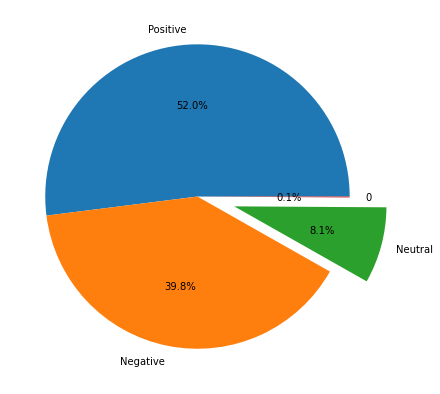

In [21]:
swn_counts= fin_data['SWN analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0, 0.25,0), autopct='%1.1f%%', shadow=False)

([<matplotlib.patches.Wedge at 0x184d74b3df0>,
 [Text(-0.06906950569907239, 1.0978294054098232, 'Positive'),
  Text(-0.21290453772296367, -1.079199544948464, 'Negative'),
  Text(1.3043650099520903, -0.3480401137982284, 'Neutral'),
  Text(1.0999945713550003, -0.0034558630657477354, '0')],
 [Text(-0.03767427583585766, 0.5988160393144489, '52.0%'),
  Text(-0.11612974784888926, -0.5886542972446166, '39.8%'),
  Text(0.8212668581179827, -0.21913636794703273, '8.1%'),
  Text(0.5999970389209093, -0.0018850162176805828, '0.1%')])

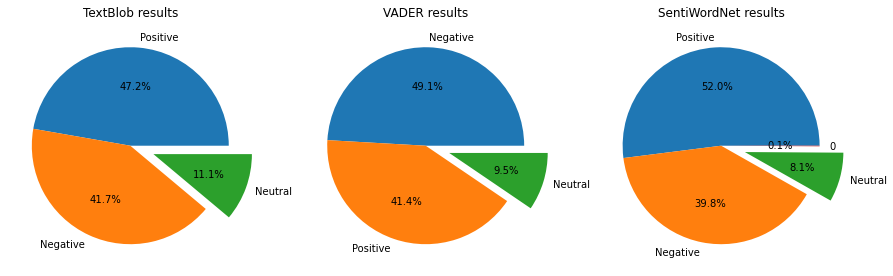

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0, 0.25,0), autopct='%1.1f%%', shadow=False)

## Clasificación de Texto

In [6]:
features = df.iloc[:, 0].values
labels = df.iloc[:, 1].values

In [24]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))
    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 
    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [25]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

### Clasificación de texto con Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [28]:
predictionsRF = text_classifier.predict(X_test)


In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

MatrizConfusiónRF=confusion_matrix(y_test,predictionsRF)
ClasificaciónRF=classification_report(y_test,predictionsRF)
ScoreRF=accuracy_score(y_test, predictionsRF)

print("Matriz de Confusion RF")
print(MatrizConfusiónRF)
print("Clasificación RF")
print(ClasificaciónRF)
print("Score RF")
print(ScoreRF)

Matriz de Confusion RF
[[169  31]
 [ 21 179]]
Clasificación RF
              precision    recall  f1-score   support

 No Suicidio       0.89      0.84      0.87       200
    Suicidio       0.85      0.90      0.87       200

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400

Score RF
0.87


### Clasificación de texto con KNeighbors

In [30]:
from sklearn.neighbors import KNeighborsClassifier

text_classifier = KNeighborsClassifier(n_neighbors=10)
text_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [31]:
predictionsKN = text_classifier.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

MatrizConfusiónKN=confusion_matrix(y_test,predictionsKN)
ClasificaciónKN=classification_report(y_test,predictionsKN)
ScoreKN=accuracy_score(y_test, predictionsKN)

print("Matriz de Confusion KN")
print(MatrizConfusiónKN)
print("Clasificación KN")
print(ClasificaciónKN)
print("Score KN")
print(ScoreKN)

Matriz de Confusion KN
[[183  17]
 [ 59 141]]
Clasificación KN
              precision    recall  f1-score   support

 No Suicidio       0.76      0.92      0.83       200
    Suicidio       0.89      0.70      0.79       200

    accuracy                           0.81       400
   macro avg       0.82      0.81      0.81       400
weighted avg       0.82      0.81      0.81       400

Score KN
0.81


### Clasificación de texto con Naive Bayes

In [33]:
from sklearn.naive_bayes import MultinomialNB

text_classifier = MultinomialNB(alpha=0.01)
text_classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.01)

In [34]:
predictionsNB = text_classifier.predict(X_test)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

MatrizConfusiónNB=confusion_matrix(y_test,predictionsNB)
ClasificaciónNB=classification_report(y_test,predictionsNB)
ScoreNB=accuracy_score(y_test, predictionsKN)

print("Matriz de Confusion NB")
print(MatrizConfusiónNB)
print("Clasificación NB")
print(ClasificaciónNB)
print("Score NB")
print(ScoreNB)

Matriz de Confusion NB
[[145  55]
 [ 10 190]]
Clasificación NB
              precision    recall  f1-score   support

 No Suicidio       0.94      0.72      0.82       200
    Suicidio       0.78      0.95      0.85       200

    accuracy                           0.84       400
   macro avg       0.86      0.84      0.84       400
weighted avg       0.86      0.84      0.84       400

Score NB
0.81


### Clasificación de texto con Support Vector Machine

In [46]:
from sklearn.svm import LinearSVC

text_classifier=LinearSVC(dual=False, penalty='l1', tol=0.001)
text_classifier.fit(X_train, y_train)

LinearSVC(dual=False, penalty='l1', tol=0.001)

In [47]:
predictionsSVC = text_classifier.predict(X_test)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

MatrizConfusiónSVC=confusion_matrix(y_test,predictionsSVC)
ClasificaciónSVC=classification_report(y_test,predictionsSVC)
ScoreSVC=accuracy_score(y_test, predictionsSVC)

print("Matriz de Confusion SVC")
print(MatrizConfusiónSVC)
print("Clasificación SVC")
print(ClasificaciónSVC)
print("Score SVC")
print(ScoreSVC)

Matriz de Confusion SVC
[[183  17]
 [ 30 170]]
Clasificación SVC
              precision    recall  f1-score   support

 No Suicidio       0.86      0.92      0.89       200
    Suicidio       0.91      0.85      0.88       200

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400

Score SVC
0.8825


### Clasificación de texto con Stochastic Gradient Descent

In [49]:
from sklearn.linear_model import SGDClassifier

text_classifier = SGDClassifier(max_iter=50)
text_classifier.fit(X_train, y_train)

SGDClassifier(max_iter=50)

In [50]:
predictionsSGD = text_classifier.predict(X_test)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

MatrizConfusiónSGD=confusion_matrix(y_test,predictionsSGD)
ClasificaciónSGD=classification_report(y_test,predictionsSGD)
ScoreSGD=accuracy_score(y_test, predictionsSGD)

print("Matriz de Confusion SGD")
print(MatrizConfusiónSGD)
print("Clasificación SGD")
print(ClasificaciónSGD)
print("Score SGD")
print(ScoreSGD)

Matriz de Confusion SGD
[[178  22]
 [ 31 169]]
Clasificación SGD
              precision    recall  f1-score   support

 No Suicidio       0.85      0.89      0.87       200
    Suicidio       0.88      0.84      0.86       200

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400

Score SGD
0.8675


## Comparativo de modelos

In [54]:
import pandas as pd

datos = [["Random Forest",ScoreRF],
         ["K Neighbors",ScoreKN],
         ["Naive Bayes",ScoreNB],
         ["Support Vector Classifier",ScoreSVC],
         ["Stochastic Gradient Descent",ScoreSGD]]

columnas = ['Modelo','Score'] # definimos los nombres de las columnas
filas = [0,1,2,3,4] # definimos los nombres de las filas

dfdatos = pd.DataFrame(datos, columns=columnas, index=filas)

print(dfdatos)

                        Modelo   Score
0                Random Forest  0.8700
1                  K Neighbors  0.8100
2                  Naive Bayes  0.8100
3    Support Vector Classifier  0.8825
4  Stochastic Gradient Descent  0.8675


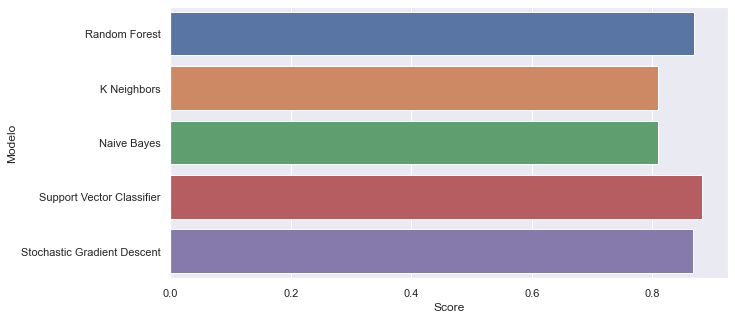

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Gráfico de barras

plt.figure(  figsize=(10,5)  )  # Tamaño del gráfico
sns.barplot(data= dfdatos, x='Score', y='Modelo', order= ['Random Forest', 'K Neighbors', 'Naive Bayes', 
            'Support Vector Classifier', 'Stochastic Gradient Descent'],orient= 'h')
def add_value_label(Score_list, Modelo_list):
    for i in range(1, len(Score_list)+1):
        plt.annotate(Modelo_list[i-1],(i,y_list[i-1]),ha="center")
plt.show()
